In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
nobel_url = 'Nobel Prize Data Set - uncleaned.xlsx'
nobel_df = pd.read_excel(nobel_url)
nobel_df

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Gender,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,"""for the discovery of Hepatitis C virus.""",3,984,Individual,Charles M. Rice,1952-08-25 00:00:00,"Sacramento, CA",United States of America,Male,Rockefeller University,"New York, NY",United States of America,NaT,NaN,NaN
1016,2020,Literature,The Nobel Prize in Literature 2020,"""for her unmistakable poetic voice that with a...",1,985,Individual,Louise Glück,1943-04-22 00:00:00,"New York, NY",United States of America,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1017,2020,Peace,The Nobel Peace Prize 2020,"""for its efforts to combat hunger, for its con...",1,986,Organization,World Food Programme (WFP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1018,2020,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for improvements to auction theory and invent...",2,987,Individual,Paul R. Milgrom,1948-04-20 00:00:00,"Detroit, MI",United States of America,Male,Stanford University,"Stanford, CA",United States of America,NaT,NaN,NaN


In [3]:
nobel_df.describe()

,Year,Prize Share,Laureate ID
count,1020.000000,1020.000000,1020.000000
mean,1972.699020,2.035294,494.795098
std,33.781707,0.942263,288.416478
min,1901.000000,1.000000,1.000000
25%,1949.000000,1.000000,242.750000
50%,1978.000000,2.000000,486.500000
75%,2002.000000,3.000000,755.250000
max,2020.000000,4.000000,988.000000


In [4]:
nobel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Year                  1020 non-null   int64         
 1   Category              1020 non-null   object        
 2   Prize                 1020 non-null   object        
 3   Motivation            932 non-null    object        
 4   Prize Share           1020 non-null   int64         
 5   Laureate ID           1020 non-null   int64         
 6   Laureate Type         1020 non-null   object        
 7   Full Name             1020 non-null   object        
 8   Birth Date            989 non-null    object        
 9   Birth City            989 non-null    object        
 10  Birth Country         992 non-null    object        
 11  Gender                991 non-null    object        
 12  Organization Name     764 non-null    object        
 13  Organization City 

In [5]:
nobel_df.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Gender,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [6]:
nobel_df['Birth Date'] = pd.to_datetime(nobel_df['Birth Date'], format = '%Y-%m-%d') 
nobel_df.head(10)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Gender,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom
9,1902,Peace,The Nobel Peace Prize 1902,NaN,2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland


In [7]:
nobel_df.shape

(1020, 18)

In [8]:
nobel_df.drop_duplicates(subset=['Full Name', 'Year'], keep='first', inplace = True)

In [9]:
nobel_df.shape

(962, 18)

In [10]:
nobel_df.loc[nobel_df['Full Name'] == 'Marie Curie, née Sklodowska']

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Gender,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France
63,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France


In [11]:
nobel_df['Year date'] = pd.to_datetime(nobel_df['Year'], format = '%Y') 

In [12]:
nobel_df.head(10)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Gender,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Year date
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,1901-01-01
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,1901-01-01
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,1901-01-01
3,1901,Peace,The Nobel Peace Prize 1901,NaN,2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,1901-01-01
4,1901,Peace,The Nobel Peace Prize 1901,NaN,2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,1901-01-01
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany,1901-01-01
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany,1902-01-01
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany,1902-01-01
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom,1902-01-01
9,1902,Peace,The Nobel Peace Prize 1902,NaN,2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland,1902-01-01


In [13]:
nobel_df['Age'] = nobel_df['Year date'] - nobel_df['Birth Date']
nobel_df['Age'] = nobel_df['Age']/np.timedelta64(1,'Y')

In [14]:
nobel_df.head(10)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Gender,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Year date,Age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,1901-01-01,48.337748
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,1901-01-01,61.797299
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,1901-01-01,46.799044
3,1901,Peace,The Nobel Peace Prize 1901,NaN,2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,1901-01-01,72.650362
4,1901,Peace,The Nobel Peace Prize 1901,NaN,2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,1901-01-01,78.619000
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany,1901-01-01,55.765690
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany,1902-01-01,49.227568
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany,1902-01-01,84.086600
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom,1902-01-01,44.636098
9,1902,Peace,The Nobel Peace Prize 1902,NaN,2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland,1902-01-01,68.863837


In [15]:
nobel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 962 entries, 0 to 1019
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Year                  962 non-null    int64         
 1   Category              962 non-null    object        
 2   Prize                 962 non-null    object        
 3   Motivation            874 non-null    object        
 4   Prize Share           962 non-null    int64         
 5   Laureate ID           962 non-null    int64         
 6   Laureate Type         962 non-null    object        
 7   Full Name             962 non-null    object        
 8   Birth Date            932 non-null    datetime64[ns]
 9   Birth City            931 non-null    object        
 10  Birth Country         934 non-null    object        
 11  Gender                933 non-null    object        
 12  Organization Name     707 non-null    object        
 13  Organization City  

In [16]:
nobel_df['Age'] = nobel_df['Age'].fillna(0)

In [17]:
nobel_df['Age'] = nobel_df['Age'].astype('int64')

In [18]:
nobel_df['Age'] = nobel_df['Age'] + 1

In [19]:
nobel_df.head(20)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Gender,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Year date,Age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,1901-01-01,49
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,1901-01-01,62
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,1901-01-01,47
3,1901,Peace,The Nobel Peace Prize 1901,NaN,2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,1901-01-01,73
4,1901,Peace,The Nobel Peace Prize 1901,NaN,2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,1901-01-01,79
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany,1901-01-01,56
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany,1902-01-01,50
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany,1902-01-01,85
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom,1902-01-01,45
9,1902,Peace,The Nobel Peace Prize 1902,NaN,2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland,1902-01-01,69


In [20]:
oldest_laureate = nobel_df['Age'].max()

In [21]:
oldest_laureate = nobel_df['Age'].max()

In [22]:
nobel_df[
    (nobel_df['Age'] == 97)]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Gender,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Year date,Age
997,2019,Chemistry,The Nobel Prize in Chemistry 2019,"""for the development of lithium-ion batteries.""",3,966,Individual,John B. Goodenough,1922-07-25,Jena,Germany,Male,University of Texas,"Austin, TX",United States of America,NaT,NaN,NaN,2019-01-01,97


In [23]:
youngest_laureate = nobel_df['Age'].min()
youngest_laureate

1

In [24]:
nobel_df.drop(nobel_df.loc[nobel_df['Age']==1].index, inplace=True)

In [25]:
youngest_laureate = nobel_df['Age'].min()
youngest_laureate

17

In [26]:
nobel_df[
    (nobel_df['Age'] == 17)]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Gender,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Year date,Age
940,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Female,NaN,NaN,NaN,NaT,NaN,NaN,2014-01-01,17


In [27]:
nobel_df

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Gender,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Year date,Age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,1901-01-01,49
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,1901-01-01,62
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,1901-01-01,47
3,1901,Peace,The Nobel Peace Prize 1901,NaN,2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,1901-01-01,73
4,1901,Peace,The Nobel Peace Prize 1901,NaN,2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,1901-01-01,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,"""for the discovery of Hepatitis C virus.""",3,983,Individual,Michael Houghton,1949-01-01,NaN,United Kingdom,Male,University of Alberta,Edmonton,Canada,NaT,NaN,NaN,2020-01-01,71
1015,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,"""for the discovery of Hepatitis C virus.""",3,984,Individual,Charles M. Rice,1952-08-25,"Sacramento, CA",United States of America,Male,Rockefeller University,"New York, NY",United States of America,NaT,NaN,NaN,2020-01-01,68
1016,2020,Literature,The Nobel Prize in Literature 2020,"""for her unmistakable poetic voice that with a...",1,985,Individual,Louise Glück,1943-04-22,"New York, NY",United States of America,NaN,NaN,NaN,NaN,NaT,NaN,NaN,2020-01-01,77
1018,2020,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for improvements to auction theory and invent...",2,987,Individual,Paul R. Milgrom,1948-04-20,"Detroit, MI",United States of America,Male,Stanford University,"Stanford, CA",United States of America,NaT,NaN,NaN,2020-01-01,72


In [28]:
nobel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932 entries, 0 to 1019
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Year                  932 non-null    int64         
 1   Category              932 non-null    object        
 2   Prize                 932 non-null    object        
 3   Motivation            860 non-null    object        
 4   Prize Share           932 non-null    int64         
 5   Laureate ID           932 non-null    int64         
 6   Laureate Type         932 non-null    object        
 7   Full Name             932 non-null    object        
 8   Birth Date            932 non-null    datetime64[ns]
 9   Birth City            929 non-null    object        
 10  Birth Country         932 non-null    object        
 11  Gender                931 non-null    object        
 12  Organization Name     705 non-null    object        
 13  Organization City  

In [29]:
nobel_categories_group = nobel_df.groupby("Category")

In [30]:
mean_age_total = nobel_categories_group['Age'].mean()
mean_age_total

Category
Chemistry     58.827027
Economics     66.988372
Literature    64.794872
Medicine      58.581081
Peace         60.897196
Physics       56.460465
Name: Age, dtype: float64

In [31]:
median_age_total = nobel_categories_group['Age'].median()
median_age_total

Category
Chemistry     58
Economics     67
Literature    67
Medicine      57
Peace         62
Physics       55
Name: Age, dtype: int64

In [32]:
mean_age_category_df = pd.DataFrame ({"Average Age" : mean_age_total})

In [33]:
mean_age_category_df

,Average Age
Category,
Chemistry,58.827027
Economics,66.988372
Literature,64.794872
Medicine,58.581081
Peace,60.897196
Physics,56.460465


In [34]:
mean_median_age_cat_df = pd.DataFrame ({"Average Age" : mean_age_total, "Median Age" : median_age_total}).astype(int)
mean_median_age_cat_df 

,Average Age,Median Age
Category,,
Chemistry,58,58
Economics,66,67
Literature,64,67
Medicine,58,57
Peace,60,62
Physics,56,55


c:\users\vohra\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

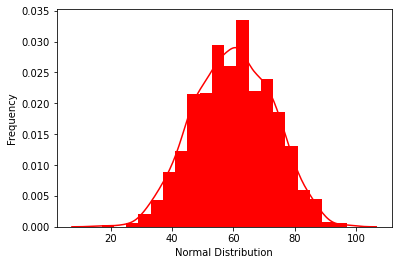

In [35]:
ax = sns.distplot(nobel_df['Age'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

In [36]:
nobel_categories_group_gender = nobel_df.groupby(["Category","Gender"])

In [37]:
count_gender = nobel_categories_group_gender["Laureate ID"].count()
count_gender

Category    Gender
Chemistry   Female      7
            Male      178
Economics   Female      2
            Male       84
Literature  Female     15
            Male      101
Medicine    Female     12
            Male      210
Peace       Female     17
            Male       90
Physics     Female      4
            Male      211
Name: Laureate ID, dtype: int64

In [38]:
total_count_gender = count_gender.sum()
total_count_gender

931

In [39]:
writer = pd.ExcelWriter('nobel_output_cleaned.xlsx')

In [40]:
nobel_df.to_excel(writer)

In [41]:
writer.save()

In [42]:
median_age_total = nobel_df['Age'].median()
median_age_total

60.0

In [43]:
mean_age_total = nobel_df['Age'].mean()
mean_age_total

59.962446351931334